<Figure size 1000x600 with 0 Axes>

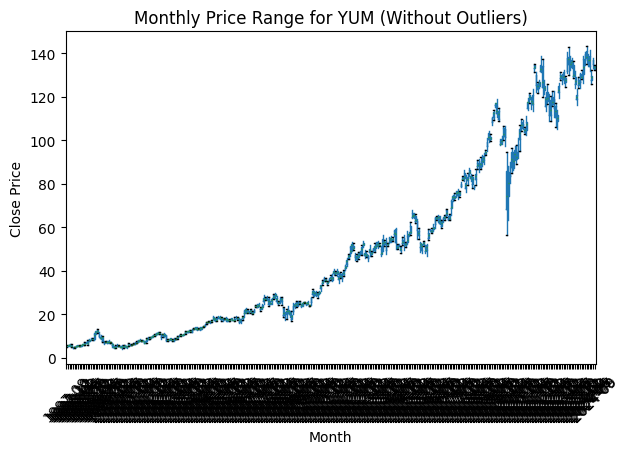

<Figure size 1000x600 with 0 Axes>

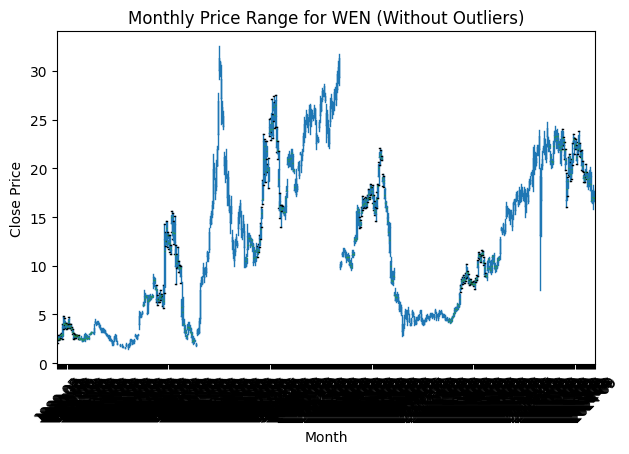

<Figure size 1000x600 with 0 Axes>

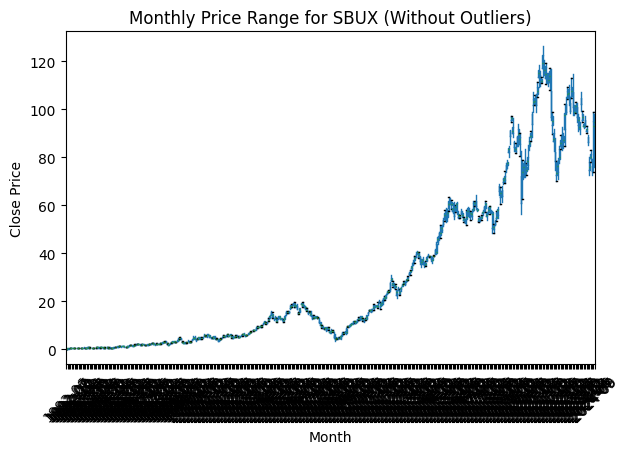

<Figure size 1000x600 with 0 Axes>

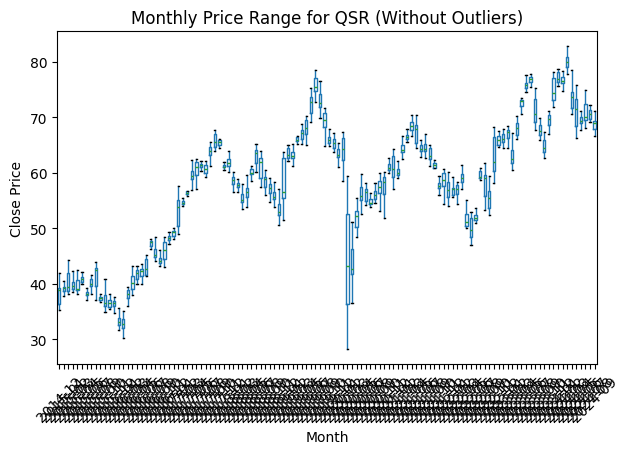

<Figure size 1000x600 with 0 Axes>

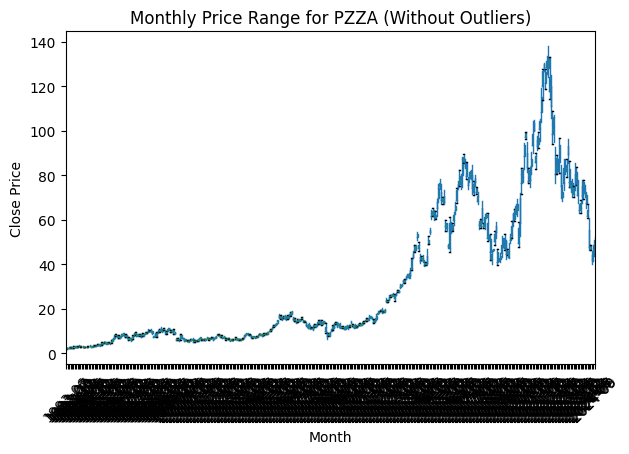

<Figure size 1000x600 with 0 Axes>

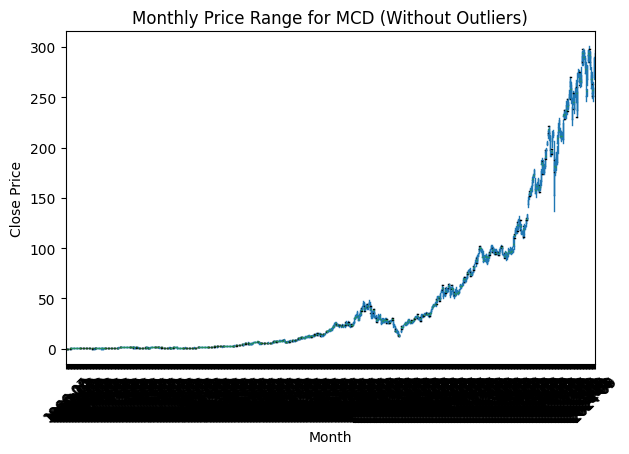

<Figure size 1000x600 with 0 Axes>

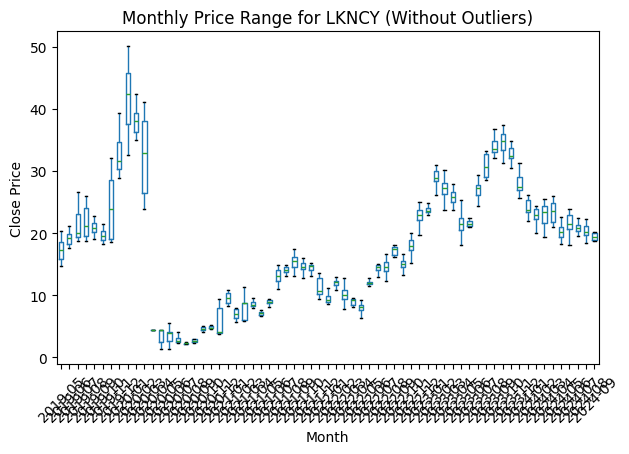

<Figure size 1000x600 with 0 Axes>

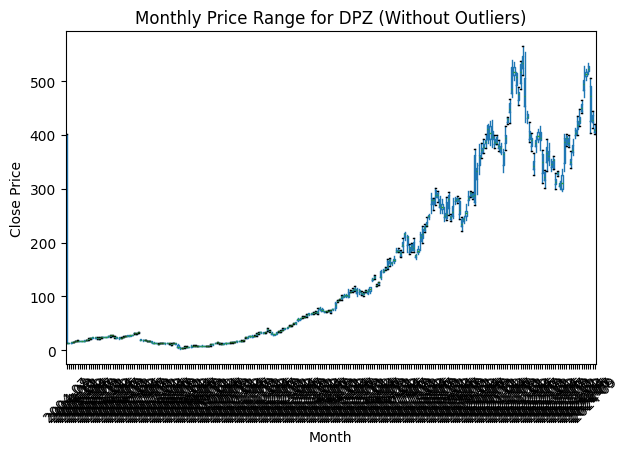

<Figure size 1000x600 with 0 Axes>

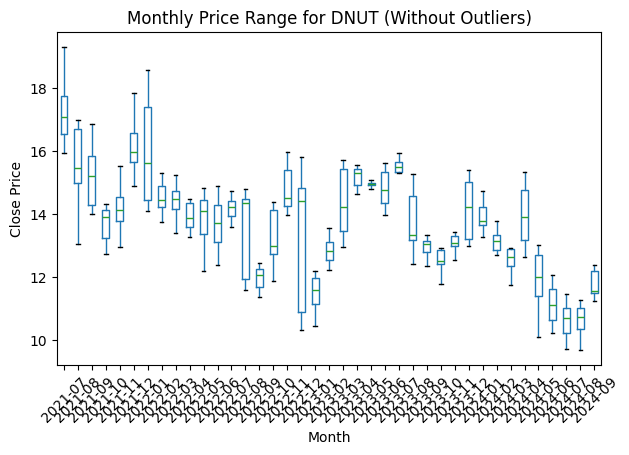

<Figure size 1000x600 with 0 Axes>

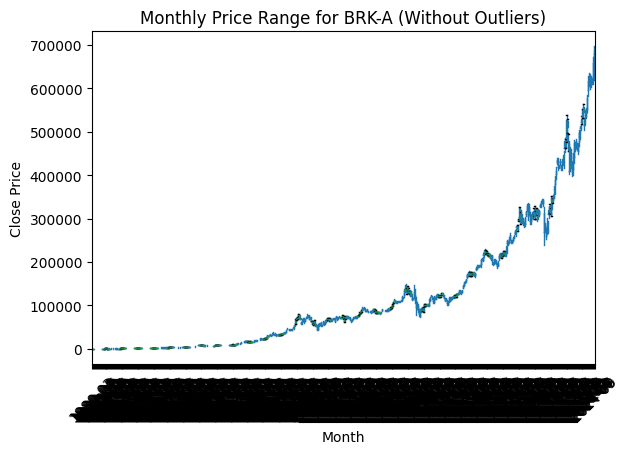

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    "YUM": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/YUM.csv",
    "WEN": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/WEN.csv",
    "SBUX": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/SBUX.csv",
    "QSR": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/QSR.csv",
    "PZZA": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/PZZA.csv",
    "MCD": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/MCD.csv",
    "LKNCY": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/LKNCY.csv",
    "DPZ": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DPZ.csv",
    "DNUT": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DNUT.csv",
    "BRK-A": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/BRK-A.csv"
}

# Adjust box plots to exclude outliers (no circles shown)
for company, file_path in file_paths.items():
    # Load data
    data = pd.read_csv(file_path)
    
    # Ensure necessary columns are present
    if 'Date' not in data.columns or 'Close' not in data.columns:
        print(f"File for {company} is missing 'Date' or 'Close' column.")
        continue

    # Convert Date to datetime and extract year-month for grouping
    data['Date'] = pd.to_datetime(data['Date'])
    data['YearMonth'] = data['Date'].dt.to_period('M')

    # Plot data
    plt.figure(figsize=(10, 6))
    data.boxplot(column='Close', by='YearMonth', grid=False, showfliers=False)  # Disabling outliers
    plt.title(f"Monthly Price Range for {company} (Without Outliers)")
    plt.suptitle('')  # Remove automatic subtitle
    plt.xlabel("Month")
    plt.ylabel("Close Price")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


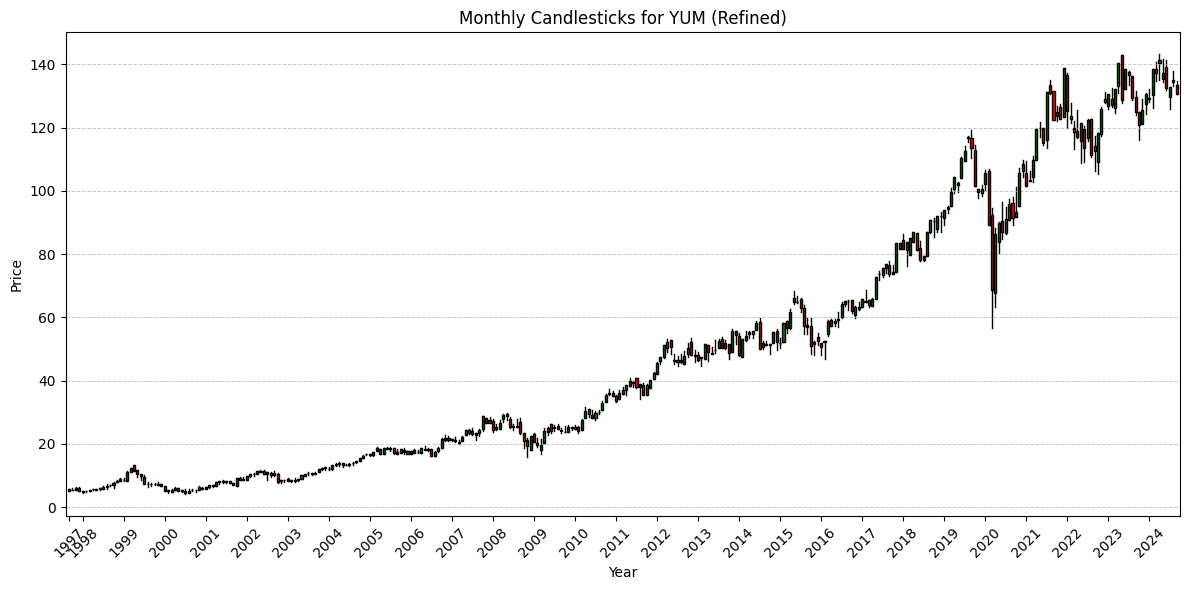

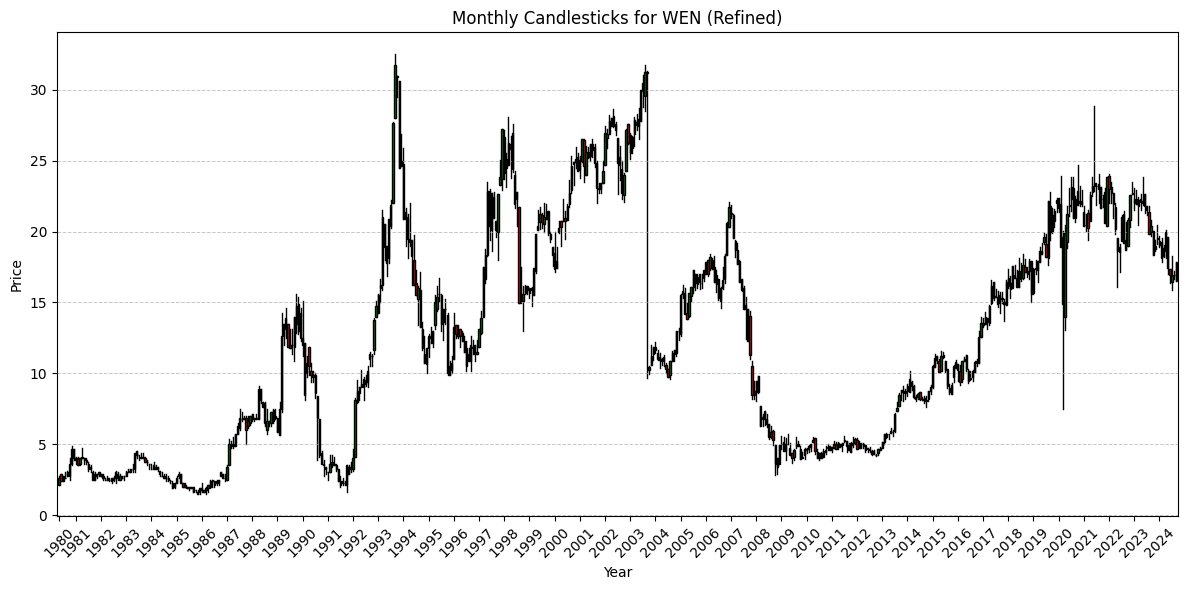

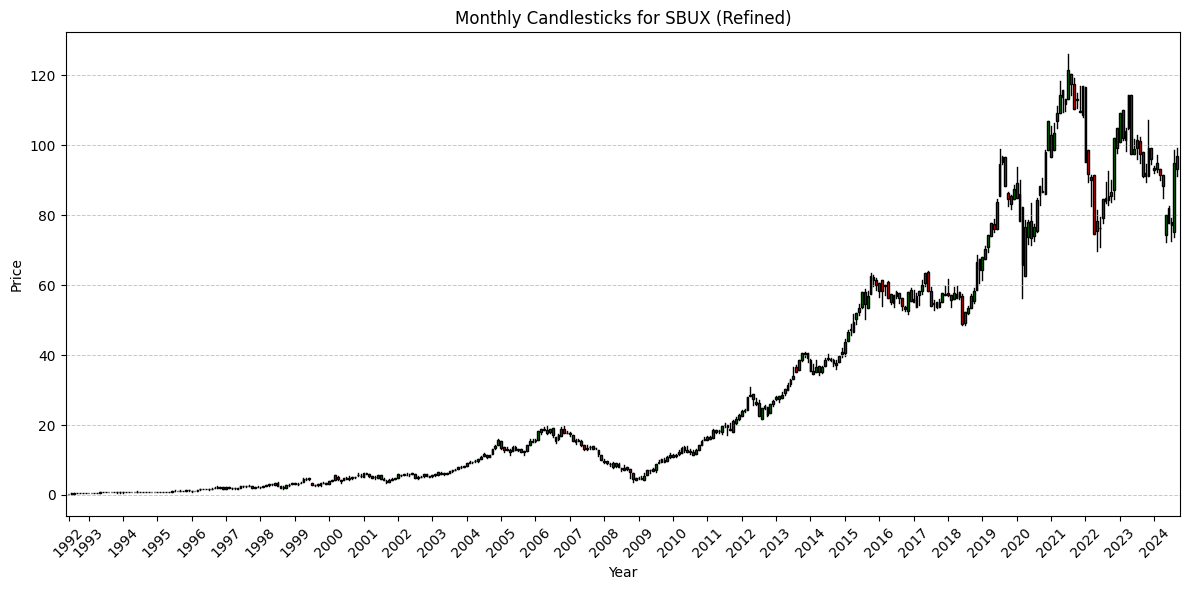

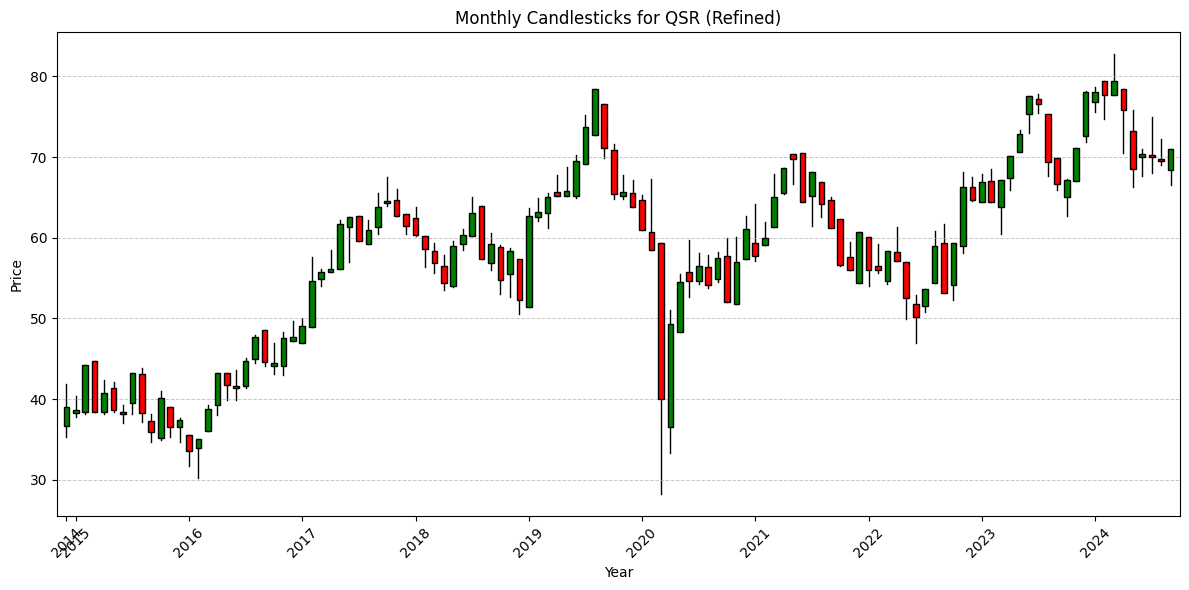

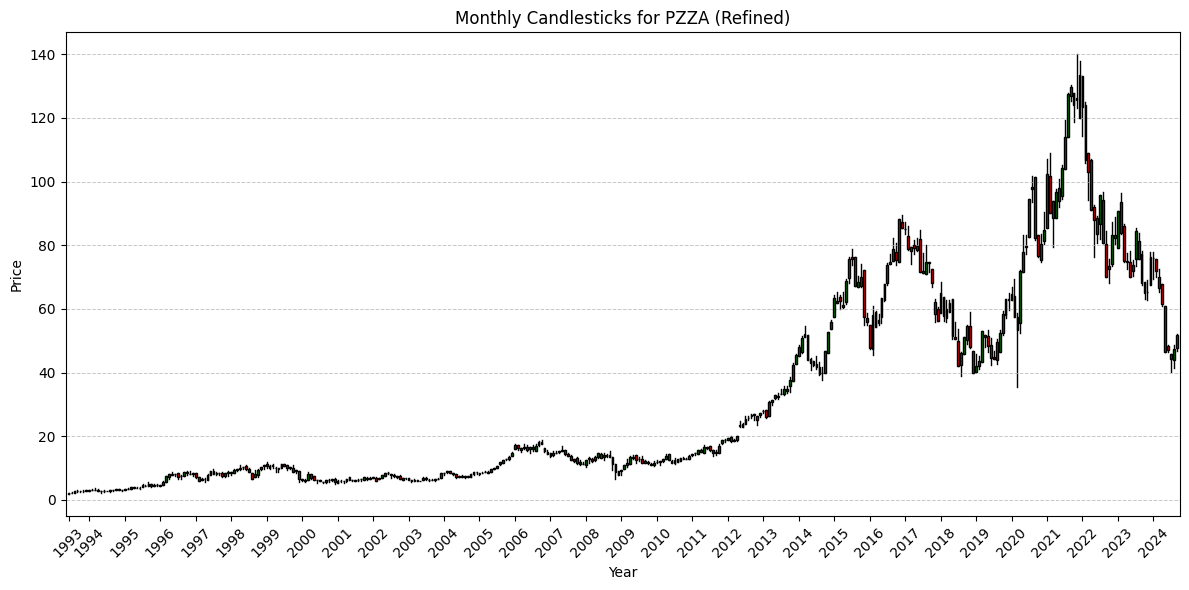

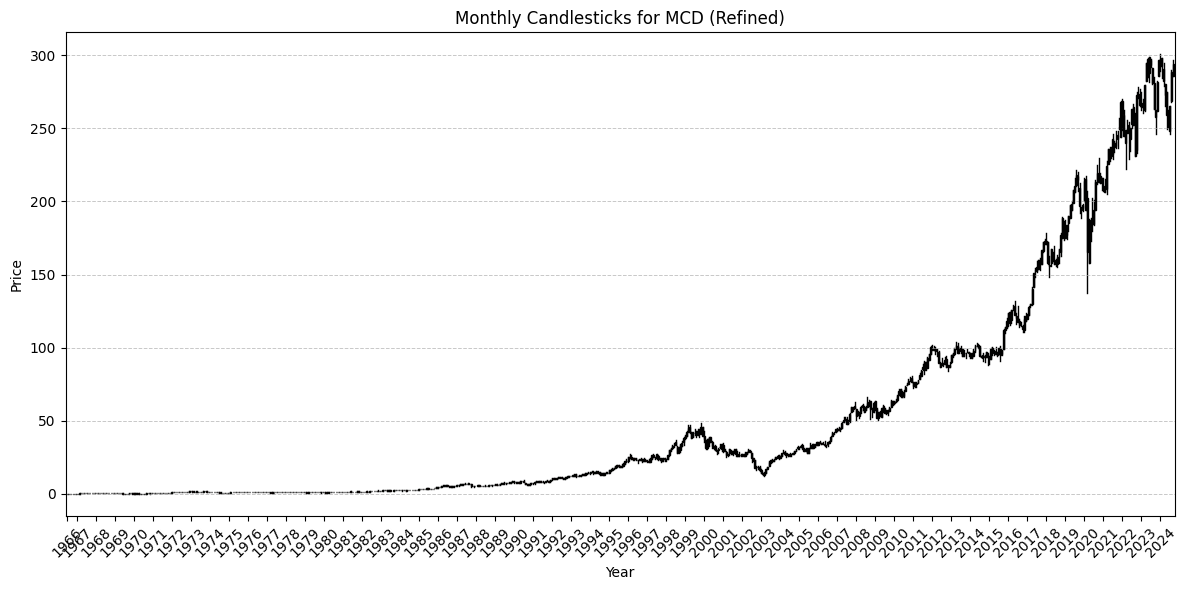

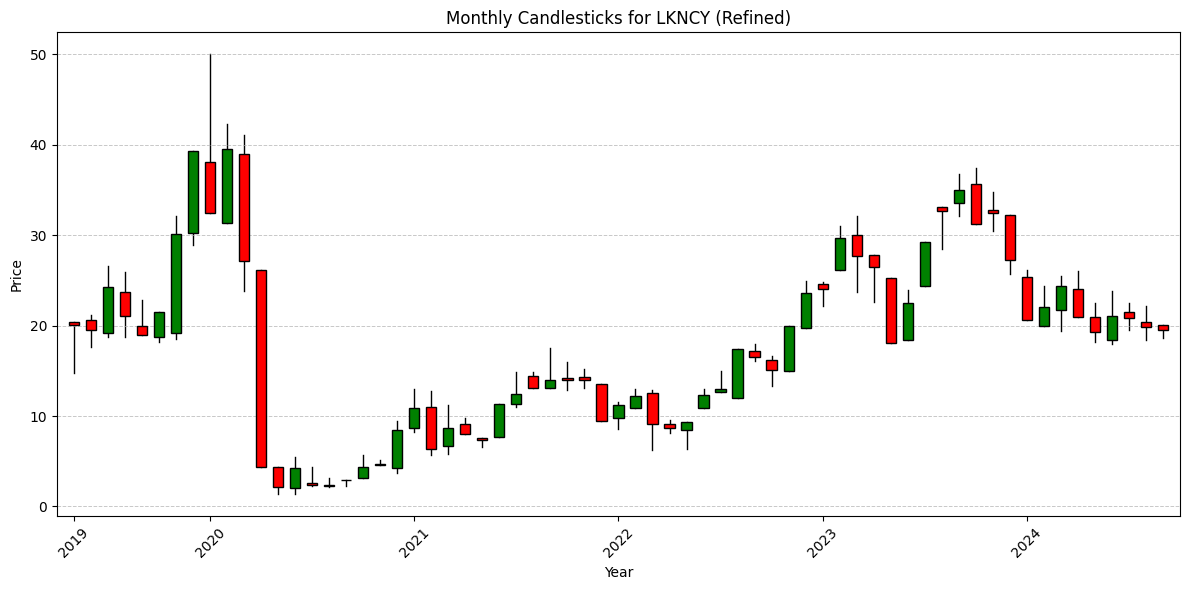

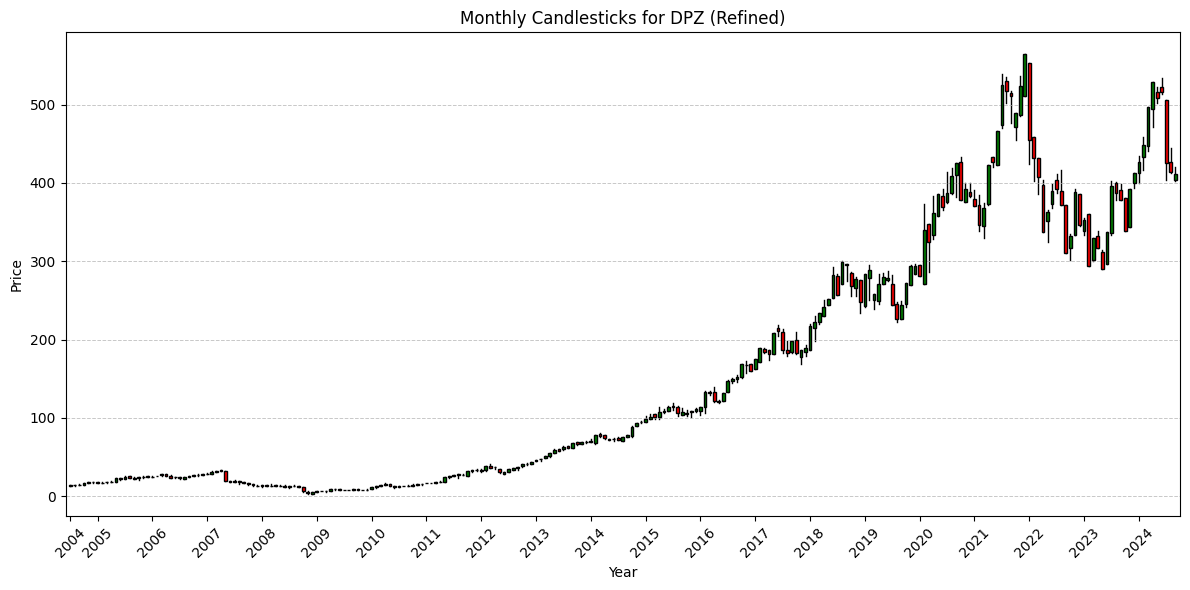

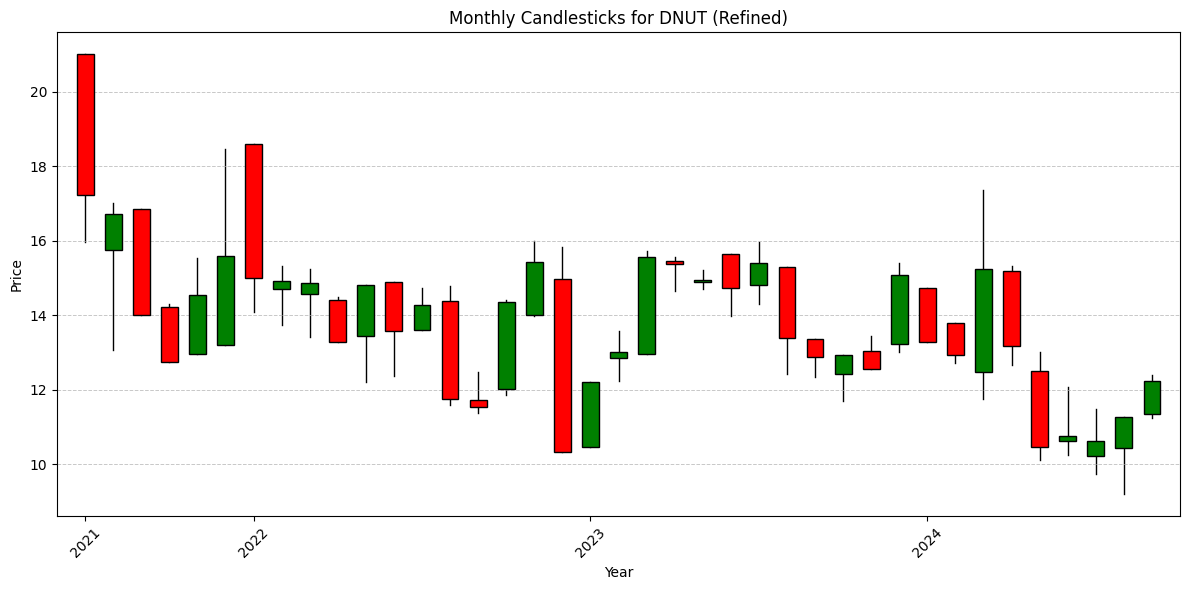

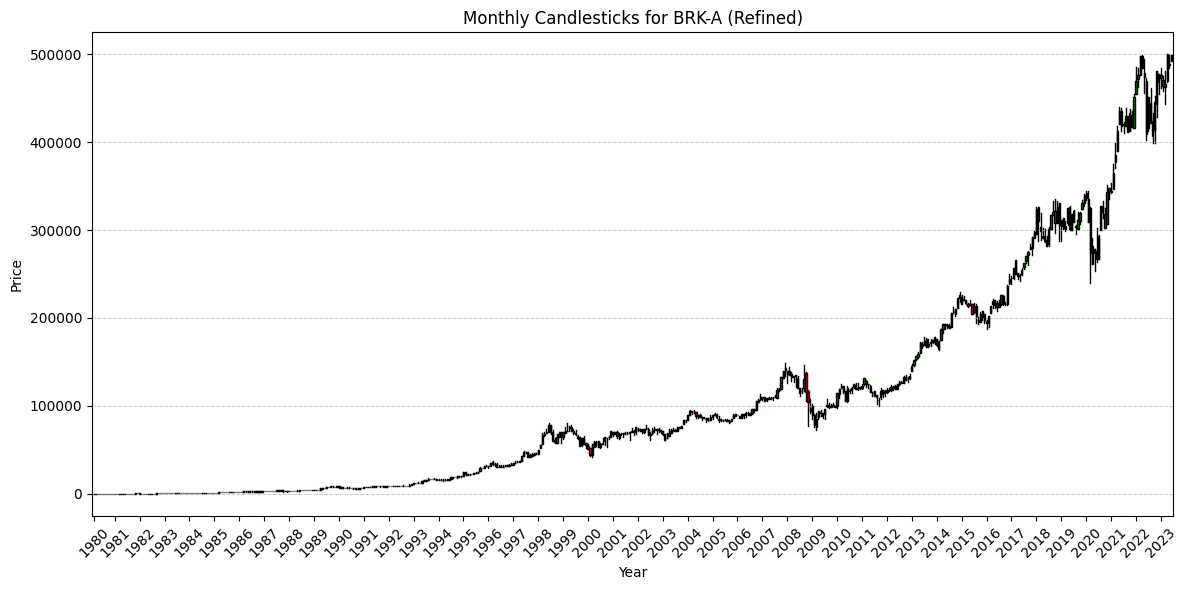

In [11]:
# Define thresholds for outliers
outlier_thresholds = {
    "BRK-A": 1,
    "DNUT": 80,
    "DPZ": 1000,
    "LKNCY": 100,
    "MCD": 400,
    "PZZA": 200,
    "QSR": 300,
    "SBUX": 200,
    "WEN": 80,
    "YUM": 300
}

# Adjusting the candlestick charts to show only the year on the x-axis and refine BRK-A visualization
def plot_candlesticks_refined(data, company_name, threshold):
    # Convert Date to datetime and extract year-month for grouping
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year  # Extract year for simpler x-axis labels
    data['YearMonth'] = data['Date'].dt.to_period('M')
    
    # Remove data points above the threshold
    data = data[data['Close'] <= threshold]
    
    # Group by year-month and calculate open, close, high, and low prices
    monthly_data = data.groupby('YearMonth').agg(
        Open=('Close', 'first'),
        Close=('Close', 'last'),
        High=('Close', 'max'),
        Low=('Close', 'min'),
        Year=('Year', 'first')  # Keep year for x-axis labeling
    ).reset_index()
    
    # Determine colors based on monthly performance
    monthly_data['Color'] = ['green' if close > open_ else 'red' 
                             for open_, close in zip(monthly_data['Open'], monthly_data['Close'])]
    
    # Plot candlesticks
    plt.figure(figsize=(12, 6))
    for i, row in monthly_data.iterrows():
        # Plot wick (high-low) in black
        plt.plot([i, i], [row['Low'], row['High']], color='black', linewidth=1, zorder=1)
        # Plot candle body (open-close) in green/red
        plt.gca().add_patch(plt.Rectangle((i - 0.3, min(row['Open'], row['Close'])),
                                          0.6, abs(row['Close'] - row['Open']),
                                          color=row['Color'], ec='black', zorder=2))
    
    # Formatting the plot
    plt.title(f"Monthly Candlesticks for {company_name} (Refined)")
    plt.xlabel("Year")
    plt.ylabel("Price")
    
    # Simplify x-axis to show only years
    years = monthly_data['Year'].unique()
    year_positions = [monthly_data[monthly_data['Year'] == year].index[0] for year in years]
    plt.xticks(ticks=year_positions, labels=years, rotation=45)
    
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.xlim(-1, len(monthly_data))  # Add some spacing for visual appeal
    plt.tight_layout()
    plt.show()

# Generate the refined candlestick charts
for company, file_path in file_paths.items():
    # Load data
    data = pd.read_csv(file_path)
    if 'Date' not in data.columns or 'Close' not in data.columns:
        print(f"File for {company} is missing 'Date' or 'Close' column.")
        continue
    
    # Apply special handling for BRK-A to make it more appropriate
    threshold = outlier_thresholds[company]
    if company == "BRK-A":
        threshold = 500000  # Assume a realistic high value for BRK-A
    
    plot_candlesticks_refined(data, company, threshold)
